# Weather prediction-Ensemble Methods

https://www.kaggle.com/datasets/ananthr1/weather-prediction

**Objective of this Notebook:**

***This notebook aims to:***
* Easy and ***Begginers guide***.
* Analyse Each and Every ***Attributes*** in the data set.
* Build Various ***ML Models*** with the view of ***increasing accuracy*** of the Model.


The ***Machine learning Models used*** are:

    1.K-Nearest Neighbour(KNN)
    
    2.Support Vector Machine(SVM)
    
    3.Gradient Boost
    
    4.Extreme Gradient Boosting(XGBC)

# 2.**IMPORTING THE REQUIRED LIBRARIES**

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# 3.**ANALYSING THE DATASET**

There are **6 Variables** in this Dataset:
* **4 Continuous** Variables.
* **1 Variable** to accommodate the Date.
* **1 Variable** refers the Weather.

In [55]:
data=pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [56]:
data.shape

(1461, 6)

As of it has **6 Columns** with total of **1461 Rows** as our observations in the Data set.

# 4.**DATA EXPLORATION**

It is the process of Exploring the data from the **"RAW"** data set tha we have taken or Imported.

First let us Deal with the Categorical variables

<Axes: xlabel='weather', ylabel='count'>

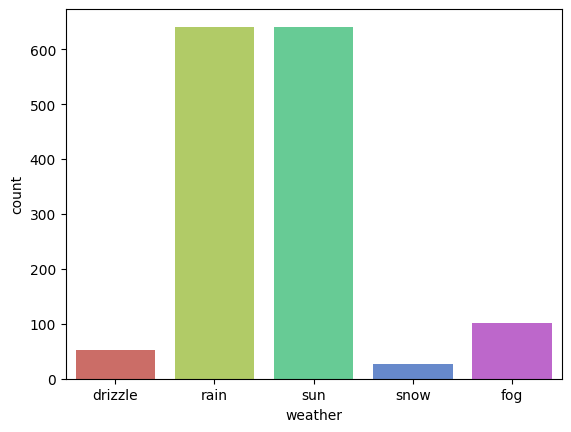

In [57]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=data, palette="hls")

# 5.**NUMERICAL OR CONTINUOUS VARIABLES**

  Next we will explore the ***Continuous variables***

In [58]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# 7.NULL VALUES:

In [59]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# 8.DATA PREPROCESSING:

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [60]:
df=data.drop(["date"],axis=1)

In [61]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


***Scaling the weather variables using label Encoder:***

In [62]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [63]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [64]:
X=df[['precipitation','temp_max','temp_min','wind']]
y=df['weather']

***SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:***

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

# 9.ALGORITHMS AND MODEL TRAINING:

**K-NEAREST NEIGHBOR CLASSIFIER:**

In [66]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:78.23%


**Logistic Regression - CLASSIFIER:**

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Logistic Reression Accuracy:{:.2f}%".format(logreg.score(x_test,y_test)*100))

Logistic Reression Accuracy:88.44%


**Decision Tree Classifier:**

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

accuracy = dt.score(x_test, y_test)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))

Decision Tree Accuracy: 81.63%


In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize individual classifier models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Create majority voting ensemble
ensemble = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn), ('dt', dt)], voting='hard')

# Fit ensemble on data
ensemble.fit(X, y)

VotingClassifier(estimators=[('logreg', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [71]:
# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(x_test, y_test)*100} %")

Accuracy of the ensemble: 91.83673469387756 %


In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier


# Initialize individual classifier models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Create a stacking ensemble
stack = StackingClassifier(estimators=[('logreg', logreg), ('knn', knn), ('dt', dt)], final_estimator=LogisticRegression())

# Fit ensemble on data
stack.fit(X, y)

# Make predictions
y_pred = stack.predict(X)

# Evaluate performance
acc = accuracy_score(y, y_pred)
acc = acc*100
print(f'Accuracy: {acc:.2f} %')

Accuracy: 85.42 %


In [75]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging ensemble
bag = BaggingClassifier(base_estimator=dt, n_estimators=10)

# Fit ensemble on data
bag.fit(X, y)

# Make predictions
y_pred = bag.predict(X)

# Evaluate performance
acc = accuracy_score(y, y_pred)
acc = acc *100
print(f'Accuracy: {acc:.2f} %')

Accuracy: 98.70 %


# 10.CHECKING FOR THE USER INPUT:

In [70]:
input=[[1.140175,8.9,2.8,2.469818]]
ensemblemodel=ensemble.predict(input)
print("The weather is:")
if(ensemblemodel==0):
    print("Drizzle")
elif(ensemblemodel==1):
    print("Fog")
elif(ensemblemodel==2):
    print("Rain")
elif(ensemblemodel==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
